In [65]:
import yfinance as yf
import pandas
import os

In [66]:
ticker = yf.Ticker("SPY")
df0 = ticker.history(start = '2013-01-01')

<Axes: >

54.75%


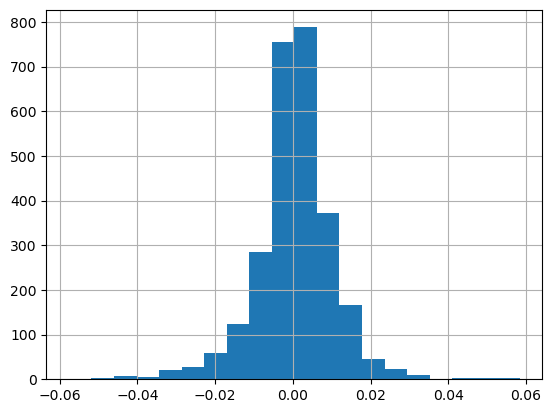

In [68]:
df = df0.copy()
df['pctchg'] = df['Close'].pct_change()

df= df.loc[(df['pctchg']>-0.06) & (df['pctchg']<0.06)]
display(df['pctchg'].hist(bins = 20))

pos = len(df.loc[df['pctchg']>0])

print(f'{pos / len(df) * 100:.2f}%')

<Axes: xlabel='Date'>

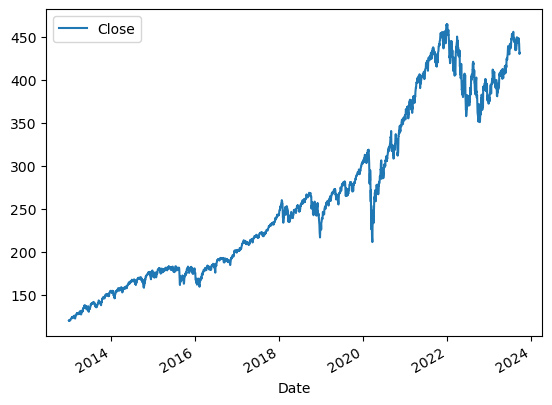

In [27]:
df0.plot(y = 'Close')

<Axes: >

60.55%


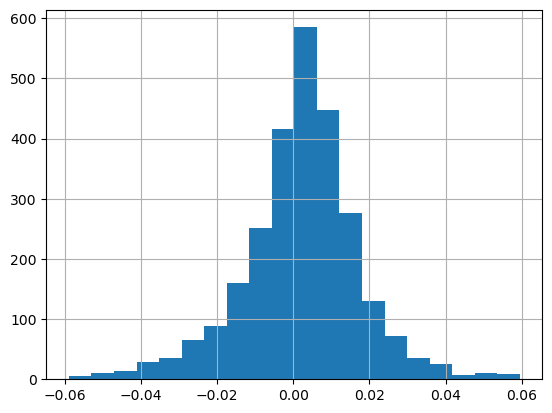

In [69]:
df = df0.copy()

# creating the percent change
df['pctchg'] = df['Close'].pct_change()

# making a shifted version of the close so we can see previous and future closes
df['prev'] = df['pctchg'].shift(1)
df['prev2'] = df['pctchg'].shift(2)
df['fwd'] = df['pctchg'].shift(-1) + df['pctchg'].shift(-2) + df['pctchg'].shift(-3)
# df.loc[(df['pctchg']<0) & (df['prev']<0) & (df['prev2']<0)]

df= df.loc[(df['fwd']>-0.06) & (df['fwd']<0.06)]

display(df['fwd'].hist(bins = 20))

pos = len(df.loc[df['fwd']>0])

print(f'{pos / len(df) * 100:.2f}%')

In [70]:
df = df0.copy()
df['pctchg'] = df0['Close'].pct_change()
std= df['pctchg'].std()
std

0.010789975442959662

<Axes: >

55.13%


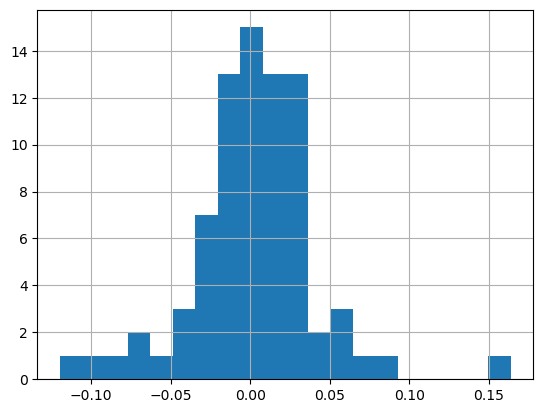

In [71]:
df = df0.copy()
df['pctchg'] = df0['Close'].pct_change()
std= df['pctchg'].std()
mean= df['pctchg'].mean()


df['fwd'] = df['pctchg'].shift(-1) + df['pctchg'].shift(-2) + df['pctchg'].shift(-3)

df = df.loc[(df['pctchg']<(mean-2*std))]

# df= df.loc[(df['fwd']>-0.06) & (df['fwd']<0.06)]

display(df['fwd'].hist(bins = 20))

pos = len(df.loc[df['fwd']>0])

print(f'{pos / len(df) * 100:.2f}%')

<Axes: >

38.78%


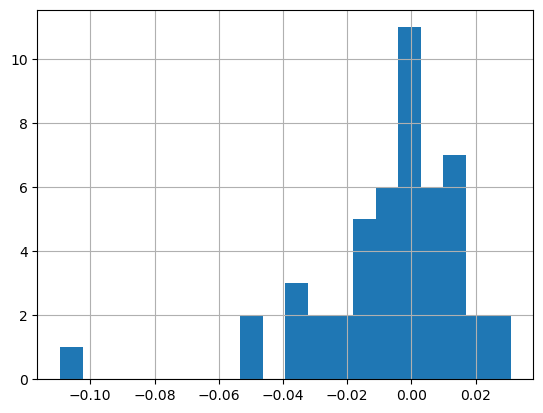

In [72]:
df = df0.copy()
df['pctchg'] = df0['Close'].pct_change()
std= df['pctchg'].std()
mean= df['pctchg'].mean()


df['fwd'] = df['pctchg'].shift(-1) # + df['pctchg'].shift(-2) + df['pctchg'].shift(-3)

df = df.loc[(df['pctchg']>(mean+2*std))]

# df= df.loc[(df['fwd']>-0.06) & (df['fwd']<0.06)]

display(df['fwd'].hist(bins = 20))

pos = len(df.loc[df['fwd']>0])

print(f'{pos / len(df) * 100:.2f}%')

In [73]:
df = df0
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2013-01-02 00:00:00-05:00,119.196148,120.050419,118.884005,119.976494,192059000,0.0,0.0,0.0
2013-01-03 00:00:00-05:00,119.918991,120.231122,119.385061,119.705414,144761800,0.0,0.0,0.0
2013-01-04 00:00:00-05:00,119.902570,120.428278,119.656142,120.231133,116817700,0.0,0.0,0.0
2013-01-07 00:00:00-05:00,119.803976,120.017540,119.458969,119.902542,110002500,0.0,0.0,0.0
2013-01-08 00:00:00-05:00,119.689024,119.853306,119.089379,119.557594,121265100,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-09-19 00:00:00-04:00,442.679993,443.290009,439.940002,442.709991,66514600,0.0,0.0,0.0
2023-09-20 00:00:00-04:00,444.010010,444.440002,438.429993,438.640015,82562600,0.0,0.0,0.0
2023-09-21 00:00:00-04:00,435.700012,435.970001,431.230011,431.390015,103976100,0.0,0.0,0.0


In [79]:
df = df0.copy()
df['pctchg'] = df['Close'].pct_change()
mean = df['Volume'].mean()
std = df['Volume'].std()
df['volchg'] = (df['Volume'] - mean) / std 

df[['pctchg', 'volchg']].corr()

,pctchg,volchg
pctchg,1.000000,-0.203773
volchg,-0.203773,1.000000


In [84]:
df = df0.copy()
df['pctchg'] = df['Close'].pct_change()
mean = df['Volume'].mean()
std = df['Volume'].std()
df['volchg'] = (df['Volume'] - mean) / std 

pxmean = df['pctchg'].mean()
pxstd = df['pctchg'].std()

df = df.loc[(df['pctchg']<(pxmean-0.5*pxstd)) | (df['pctchg']> (pxmean + 0.5*pxstd))]

df[['pctchg', 'volchg']].corr()





,pctchg,volchg
pctchg,1.000000,-0.259225
volchg,-0.259225,1.000000
